In [83]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
import statsmodels.formula.api as smf
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train = pd.read_csv('train_export.csv')
test = pd.read_csv('test_export.csv')

In [84]:
train.head()

,campaign_id,total_links,no_of_internal_links,no_of_images,no_of_sections,id,user_id,is_open,is_click,no_of_emails,cumulative_count,day_of_week,hour_of_day,conference_percent,newsletter_percent,2017,and,artificial,datahack,days,go,hackathons,in,india,intelligence,just,learning,machine,new,newsletter,now,register,summit,to
0,29,67,61,12,3,29_185580,185580,0,0,4,0,5,18,0.25,0.25,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,30,18,14,7,1,30_185580,185580,0,0,4,2,2,14,0.25,0.25,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,33,7,3,1,1,33_185580,185580,0,0,4,3,0,14,0.25,0.25,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,49,119,117,16,1,49_185580,185580,0,0,4,1,3,15,0.25,0.25,0.181521,0.0,0.335783,0.162334,0.0,0.0,0.0,0.0,0.33229,0.335783,0.0,0.268376,0.268376,0.0,0.0,0.0,0.335783,0.162334,0.0
4,29,67,61,12,3,29_103665,103665,0,0,6,0,5,18,0.50,0.50,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [85]:
test.head()

,campaign_id,total_links,no_of_internal_links,no_of_images,no_of_sections,id,user_id,is_open,is_click,no_of_emails,cumulative_count,day_of_week,hour_of_day,conference_percent,newsletter_percent,2017,and,artificial,datahack,days,go,hackathons,in,india,intelligence,just,learning,machine,new,newsletter,now,register,summit,to
0,52,67,62,10,4,52_134438,134438,0,0,3,0,3,12,0.333333,0.666667,0.268543,0.268543,0.000000,0.268543,0.000000,0.000000,0.268543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268543,0.268543,0.000000,0.000000,0.268543,0.000000
1,53,104,100,13,1,53_134438,134438,0,0,3,1,0,23,0.333333,0.666667,0.000000,0.000000,0.262929,0.000000,0.262929,0.262929,0.000000,0.262929,0.262929,0.262929,0.262929,0.262929,0.262929,0.000000,0.000000,0.262929,0.262929,0.000000,0.262929
2,54,63,58,8,4,54_134438,134438,0,0,3,2,4,20,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,52,67,62,10,4,52_65386,65386,0,0,1,0,3,12,0.000000,1.000000,0.268543,0.268543,0.000000,0.268543,0.000000,0.000000,0.268543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268543,0.268543,0.000000,0.000000,0.268543,0.000000
4,52,67,62,10,4,52_32415,32415,0,0,2,0,3,13,0.500000,0.500000,0.268543,0.268543,0.000000,0.268543,0.000000,0.000000,0.268543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268543,0.268543,0.000000,0.000000,0.268543,0.000000


In [86]:
train.is_click.value_counts()

0    751866
1      9791
Name: is_click, dtype: int64

In [87]:
test.is_click.value_counts()

0    258543
1      2991
Name: is_click, dtype: int64

In [88]:
X_train = train.drop(['is_click','is_open'], axis = 1)
y_train = train['is_click']
X_test = test.drop(['is_click','is_open'], axis = 1)
y_test = test['is_click']

classifier = DecisionTreeClassifier(class_weight='balanced', min_samples_split=20, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
classifier=classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [89]:
X_test.head()

,campaign_id,total_links,no_of_internal_links,no_of_images,no_of_sections,id,user_id,no_of_emails,cumulative_count,day_of_week,hour_of_day,conference_percent,newsletter_percent,2017,and,artificial,datahack,days,go,hackathons,in,india,intelligence,just,learning,machine,new,newsletter,now,register,summit,to
0,52,67,62,10,4,52_134438,134438,3,0,3,12,0.333333,0.666667,0.268543,0.268543,0.000000,0.268543,0.000000,0.000000,0.268543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268543,0.268543,0.000000,0.000000,0.268543,0.000000
1,53,104,100,13,1,53_134438,134438,3,1,0,23,0.333333,0.666667,0.000000,0.000000,0.262929,0.000000,0.262929,0.262929,0.000000,0.262929,0.262929,0.262929,0.262929,0.262929,0.262929,0.000000,0.000000,0.262929,0.262929,0.000000,0.262929
2,54,63,58,8,4,54_134438,134438,3,2,4,20,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,52,67,62,10,4,52_65386,65386,1,0,3,12,0.000000,1.000000,0.268543,0.268543,0.000000,0.268543,0.000000,0.000000,0.268543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268543,0.268543,0.000000,0.000000,0.268543,0.000000
4,52,67,62,10,4,52_32415,32415,2,0,3,13,0.500000,0.500000,0.268543,0.268543,0.000000,0.268543,0.000000,0.000000,0.268543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268543,0.268543,0.000000,0.000000,0.268543,0.000000


In [90]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[ 84569, 173974],
       [   862,   2129]], dtype=int64)

In [91]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.33149800790719369

In [92]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.51945023328806039

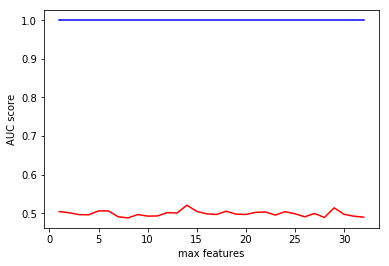

In [93]:
max_features = list(range(1,train.shape[1]-1))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

line1 = plt.plot(max_features, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(max_features, test_results, 'r', label = 'Test AUC')
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

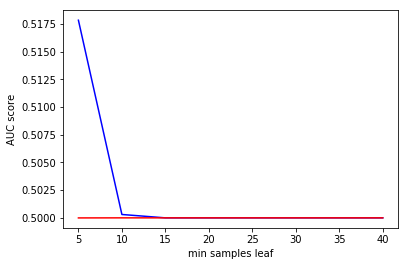

In [94]:
min_samples_leafs = [5,10,15,20,25,30,35,40]
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2 = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

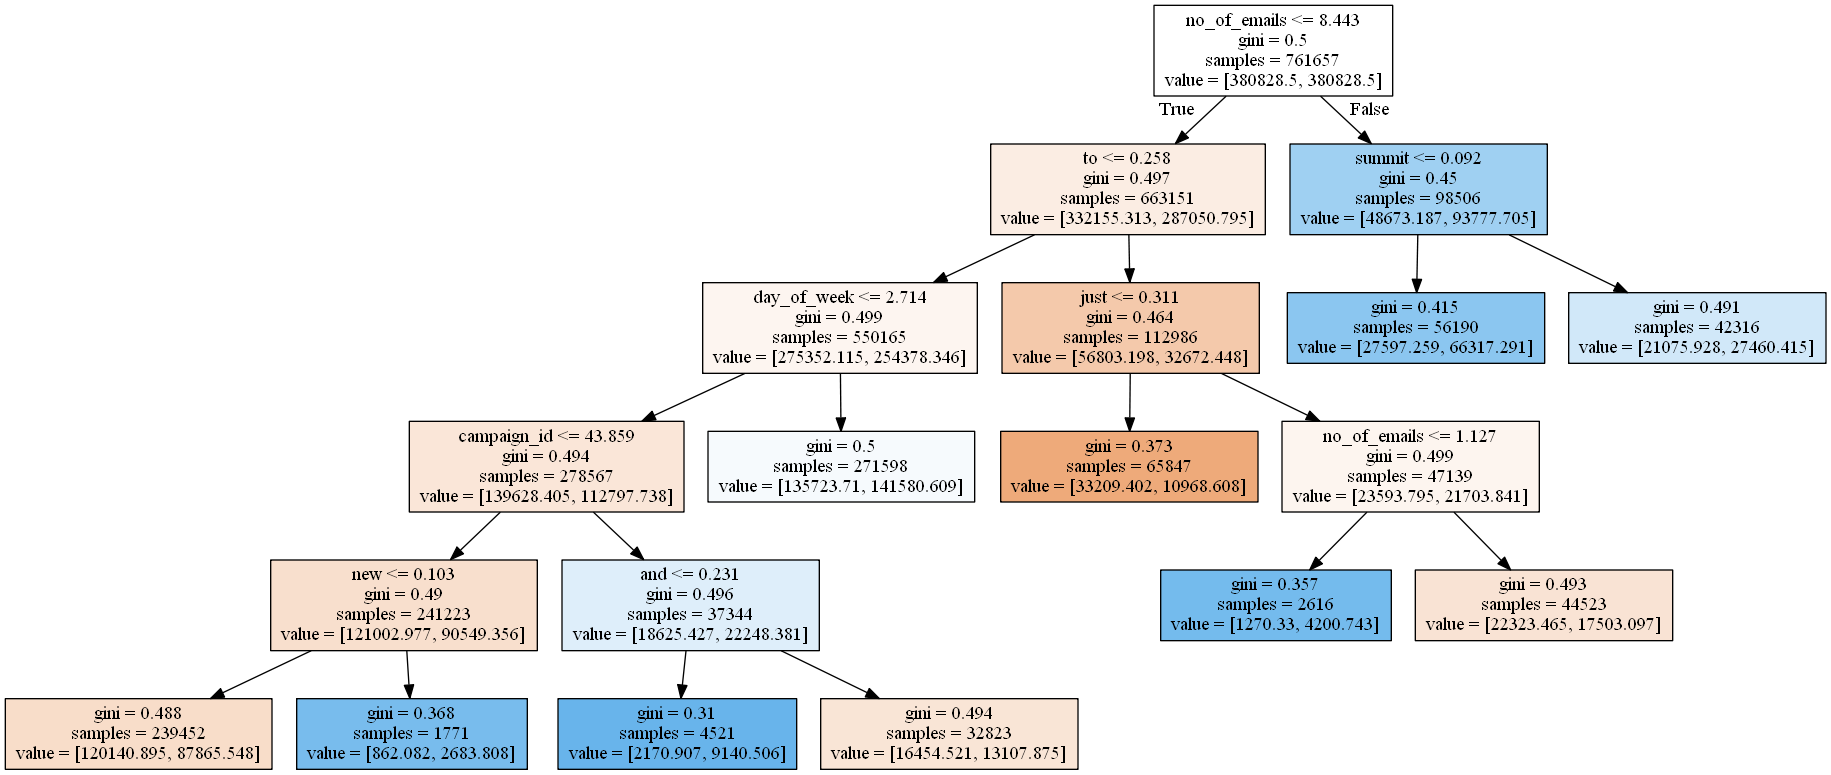

In [95]:
#Displaying the decision tree
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

out = StringIO()
tree.export_graphviz(classifier, out_file=out,feature_names = list(X_test.columns), filled = True)

graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression(class_weight = 'balanced')
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))